In [86]:
from matplotlib.ticker import MaxNLocator

In [87]:
import numpy as np
from hmmlearn import hmm
import csv
import matplotlib.pyplot as plt
import sys
from BW import *
import sys
sys.setrecursionlimit(1000000)
import datetime
from matplotlib.lines import Line2D

In [88]:
states = ["H1","H2"]
n_states = len(states)

observations = ["V1", "V2"]
n_observations = len(observations)

start_probability = np.array([0.5,0.5])

transition_probability=np.array([[0.2, 0.8],
       [0.7, 0.3]])

emission_probability = np.array([[0.75, 0.25],
       [0.3, 0.7]])
model = hmm.CategoricalHMM(n_components=n_states,n_iter=1000,tol=1e-15,init_params=" ",params="te")
model.startprob_=start_probability
model.transmat_=transition_probability
model.emissionprob_=emission_probability

In [89]:
np.random.seed(77)

In [90]:
X, Z = model.sample(100)
X.T

array([[1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
        1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
        0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
        0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
        1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1]])

In [91]:
for i in range(len(X.T[0])):
    print('v_'+repr(X.T[0][i]),end=',')
    if (i+1)%25==0:
        print(" \\\ ")

v_1,v_0,v_1,v_1,v_0,v_1,v_1,v_0,v_1,v_0,v_0,v_0,v_1,v_0,v_0,v_0,v_1,v_0,v_0,v_1,v_1,v_1,v_1,v_0,v_0, \\ 
v_1,v_1,v_0,v_0,v_0,v_1,v_0,v_1,v_1,v_1,v_1,v_0,v_0,v_0,v_1,v_1,v_1,v_0,v_1,v_0,v_1,v_0,v_0,v_1,v_1, \\ 
v_1,v_1,v_0,v_0,v_0,v_0,v_1,v_0,v_1,v_0,v_1,v_0,v_0,v_0,v_0,v_0,v_0,v_1,v_0,v_1,v_1,v_0,v_1,v_0,v_1, \\ 
v_0,v_1,v_0,v_1,v_0,v_1,v_0,v_0,v_1,v_1,v_1,v_1,v_0,v_1,v_1,v_0,v_0,v_0,v_0,v_0,v_0,v_1,v_1,v_1,v_1, \\ 


In [92]:
model.score(X.T.reshape(-1,1))

-68.79552007287361

In [93]:
#Starting from Uniform
tA=np.array([[0.5,0.5],[0.5,0.5]])
tB=np.array([[0.5,0.5],[0.5,0.5]])

In [94]:
tA,tB

(array([[0.5, 0.5],
        [0.5, 0.5]]),
 array([[0.5, 0.5],
        [0.5, 0.5]]))

In [95]:
model.transmat_=tA
model.emissionprob_=tB

In [96]:
model.score(X.T.reshape(-1,1))

-69.31471805599459

In [97]:
model=model.fit(X)

In [98]:
model.monitor_

ConvergenceMonitor(
    history=[-69.31471805599459, -69.29471672244782, -69.29471672244782],
    iter=3,
    n_iter=1000,
    tol=1e-15,
    verbose=False,
)

In [99]:
np.round(model.transmat_,3)

array([[0.5, 0.5],
       [0.5, 0.5]])

In [100]:
np.round(model.emissionprob_,3)

array([[0.51, 0.49],
       [0.51, 0.49]])

In [101]:
model.monitor_.converged

True

-69.29471672244782
[[0.5 0.5]
 [0.5 0.5]]
[[0.51 0.49]
 [0.51 0.49]]
-69.29471672244782


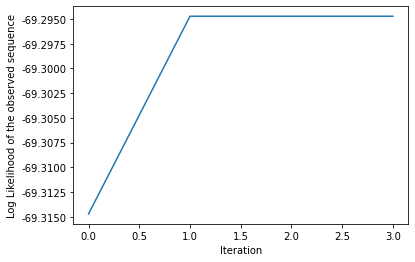

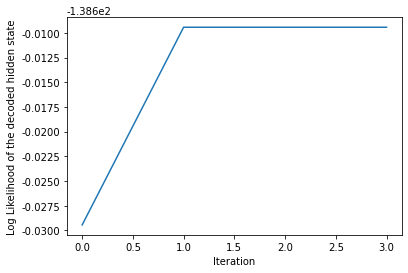

In [102]:
L1=BW(np.copy(start_probability),np.copy(tA),np.copy(tB),X,4)

[[0.5 0.5]
 [0.5 0.5]]
[[0.5 0.5]
 [0.5 0.5]]
-69.31471805599459


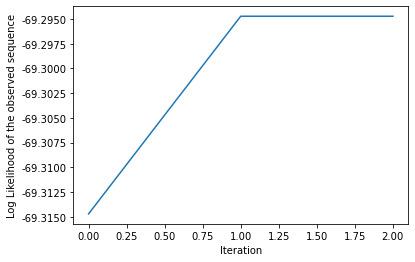

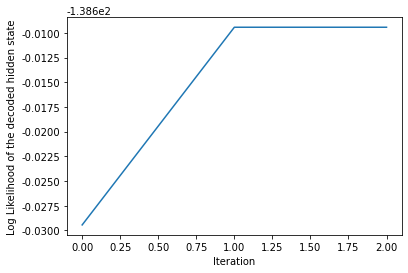

In [103]:
L1=BWlib(np.copy(start_probability),np.copy(tA),np.copy(tB),X,3)

In [104]:
np.round(model.transmat_,3)

array([[0.5, 0.5],
       [0.5, 0.5]])

In [105]:
np.round(model.emissionprob_,3)

array([[0.51, 0.49],
       [0.51, 0.49]])

In [106]:
transition_probability

array([[0.2, 0.8],
       [0.7, 0.3]])

In [107]:
from crnsimulator import ReactionGraph
from IPython.display import Image
import numpy as np
from HMMCRN import *
import crnsimulator

In [108]:
R=HMMCRN(['H1','H2'],['V1','V2'])
ob=X
R.Ob=ob
Tr=R.EM()
RG=ReactionGraph(Tr)

In [109]:
%%time
filename,odename=RG.write_ODE_lib(filename='ReactionSimulator.py')

CPU times: user 58.7 s, sys: 14.1 ms, total: 58.7 s
Wall time: 58.7 s


In [110]:
theta0=np.array([0.5,0.5])
n=2
m=2
l=len(ob)
#I=BW_init(theta0,tA,tB,X.T[0])
I=uni_init(n,m,X.T[0])
start=init_simulator(n,m,l,I,'ReactionSimulator.py')

In [111]:
!python ReactionSimulator.py --a 1e-3 --r 1e-3 --t8 1 --t-lin 100 --nxy>100.dat

CRN initialization
Starting Prob:
 [0.5 0.5]
Transition:
 [[0.5 0.5]
 [0.5 0.5]]
Emission:
 [[0.5 0.5]
 [0.5 0.5]]

CRN Equilibrium
Starting Prob:
 [0.5 0.5]
Transition:
 [[0.5 0.5]
 [0.5 0.5]]
Emission:
 [[0.51 0.49]
 [0.51 0.49]]


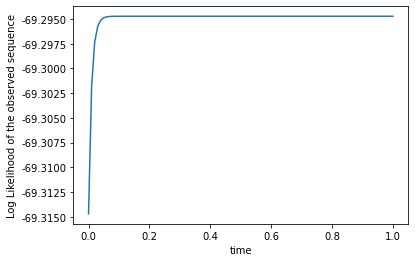

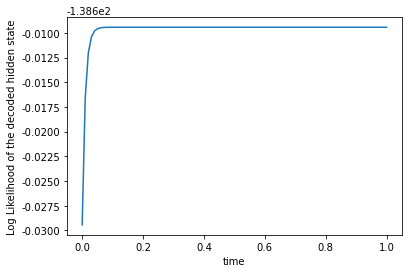

-69.2947167224477
CRN_Transition fit:
 [[0.5 0.5]
 [0.5 0.5]]
 
CRN_Emission fit:
 [[0.51 0.49]
 [0.51 0.49]]


In [112]:
Final=!tail -n 2 100.dat
Init=!head -n 2 100.dat
Y1=Init[0].split()[1:]
Y2=Final[0].split()[1:]
print_conc(start,Y1,Y2)
t1,c1L,c1T01,c1T02,c1T11,c1T12,c1T21,c1T22,c1T1_1,c1T1_2,c1T2_1,c1T2_2=crn_Liklihood('100.dat',start,ob)

In [113]:
#Image(filename='o100.png')
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

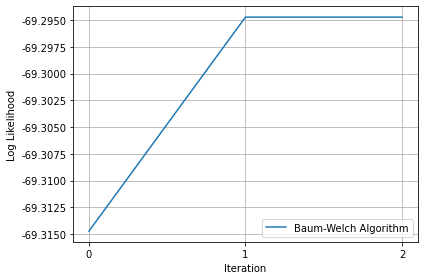

In [114]:
#Plotting BW and CRN Likelihood Trajectories
fig, ax1 = plt.subplots()
#ax1.set_facecolor('white')
ax1.grid(True)
ax1.set_ylabel(r'Log Likelihood')
ax1.plot(np.linspace(0,2,3),L1, label=r'Baum-Welch Algorithm')
ax1.set_xlabel('Iteration')
ax1.xaxis.set_major_locator(MaxNLocator(integer=True))
fig.tight_layout()
ax1.legend(loc='lower right')
ax1.set_rasterized(True)
plt.savefig('PLOTS/1-100uni_initBW.pdf', format='pdf', dpi=1000)
plt.show()

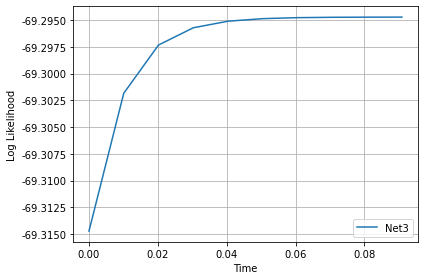

In [115]:
#Plotting BW and CRN Likelihood Trajectories
fig, ax1 = plt.subplots()
#ax1.set_facecolor('white')
ax1.grid(True)
ax1.set_ylabel(r'Log Likelihood')
ax1.plot(t1[:10],c1L[:10], label=r'Net3')
ax1.set_xlabel('Time')
fig.tight_layout()
ax1.legend(loc='lower right')
ax1.set_rasterized(True)
plt.savefig('PLOTS/1-100uni_initNet3.pdf', format='pdf', dpi=1000)
plt.show()

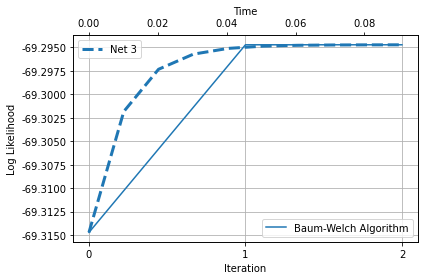

In [117]:
#Plotting BW and CRN Likelihood Trajectories
fig, ax1 = plt.subplots()
ax2 = ax1.twiny()
#ax1.set_facecolor('white')
ax1.grid(True)
ax2.grid(False)
ax1.set_ylabel(r'Log Likelihood')
ax1.plot(np.linspace(0,2,3),L1, label=r'Baum-Welch Algorithm')
ax2.plot(t1[:10],c1L[:10],'--',linewidth=3, label=r'Net 3')
ax1.set_xlabel('Iteration')
ax2.set_xlabel('Time')
ax1.xaxis.set_major_locator(MaxNLocator(integer=True))
fig.tight_layout()
ax1.legend(loc='lower right')
ax2.legend(loc='best')
ax1.set_rasterized(True)
plt.savefig('PLOTS/1-100uni_init-mix.pdf', format='pdf', dpi=1000)
plt.show()

In [ ]:
theta0=np.array([0.5,0.5])
n=2
m=2
l=len(ob)
I=ran_init(n,m,X.T[0],seed=41)
start=init_simulator(n,m,l,I,'ReactionSimulator.py')

In [ ]:
%%time
!python ReactionSimulator.py --a 1e-6 --r 1e-6 --t8 5500 --t-lin 100 --nxy>100.dat

In [ ]:
Final=!tail -n 1 100.dat
Init=!head -n 1 100.dat
Y1=Init[0].split()[1:]
Y2=Final[0].split()[1:]
print_conc(start,Y1,Y2)
t1,c1L,c1T01,c1T02,c1T11,c1T12,c1T21,c1T22,c1T1_1,c1T1_2,c1T2_1,c1T2_2=crn_Liklihood('100.dat',start,ob)

In [ ]:
tA,tB=np.array([[0.77409994,0.22590006],[0.42733296,0.57266704]]),np.array([[0.91602762,0.08397238],[0.51010622,0.48989378]])

In [ ]:
model.transmat_=tA
model.emissionprob_=tB
model.score(X.T.reshape(-1,1))

In [ ]:
%%time
model=model.fit(X)
model.monitor_

In [ ]:
model.monitor_.converged

In [ ]:
print(np.round(tA,3),'\n',np.round(tB,3))

In [ ]:
L1=BWlib(np.copy(start_probability),np.copy(tA),np.copy(tB),X,1000)

In [ ]:
#Plotting BW and CRN Likelihood Trajectories
fig, ax1 = plt.subplots()
#ax1.set_facecolor('white')
ax1.grid(True)
ax1.set_ylabel(r'Log Likelihood')
ax1.plot(t1,c1L, label=r'Net3')
ax1.set_xlabel('Time')
fig.tight_layout()
ax1.legend(loc='lower right')
ax1.set_rasterized(True)
plt.savefig('PLOTS/1-100ran_initNet3.pdf', format='pdf', dpi=1000)
plt.show()

In [ ]:
fig, ax1 = plt.subplots()
#ax1.set_facecolor('white')
ax1.grid(True)
ax1.set_ylabel(r'Log Likelihood')
ax1.plot(np.linspace(0,1000,1000),L1, label=r'Baum-Welch Algorithm')
ax1.set_xlabel('Iteration')
ax1.xaxis.set_major_locator(MaxNLocator(integer=True))
fig.tight_layout()
ax1.legend()
ax1.set_rasterized(True)
plt.savefig('PLOTS/1-100ran_initBW.pdf', format='pdf', dpi=1000)
plt.show()